# Naive Bayes Code Demo

- **Objective**: Develop a Naive Bayes model for spam detection
- **Dataset**: Detect spam vs not spam for text data using a Naive Bayes classifier.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/spam.csv', encoding='latin-1')

Drop unnecessary columns.

In [29]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.columns = ['labels', 'text']
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Encoding** response variable.

In [30]:
df['labelNum'] = df.labels.map({'ham':0, 'spam':1})
df.head()

,labels,text,labelNum
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## EDA

Look to visualize the most **common words** in the labels

In [37]:
from wordcloud import WordCloud

def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=400, height=200).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

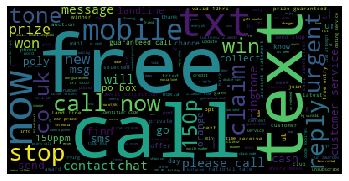

In [38]:
#word cloud for spam
visualize('spam')

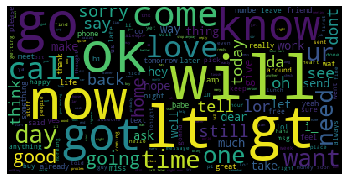

In [39]:
#word cloud for ham
visualize('ham')

In [40]:
#have a lot more ham than spam in the response variable
df['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

Let's get average **sentence length** for each of the two classes.

In [41]:
averageSentenceLength  = df.groupby('labels').text.apply(lambda x: x.str.split().str.len().mean())
averageSentenceLength

labels
ham     14.200622
spam    23.851406
Name: text, dtype: float64

Look for most **common** words in the dataset for the two different classes.

In [42]:
from collections import Counter
ham = df[df['labels'] == 'ham']
spam = df[df['labels'] == 'spam']

In [43]:
#most common words in ham
Counter(" ".join(ham["text"]).split()).most_common(20)

[('to', 1530),
 ('you', 1458),
 ('I', 1436),
 ('the', 1019),
 ('a', 969),
 ('and', 738),
 ('i', 736),
 ('in', 734),
 ('u', 645),
 ('is', 638),
 ('my', 619),
 ('me', 537),
 ('of', 498),
 ('for', 475),
 ('that', 398),
 ('it', 375),
 ('your', 373),
 ('on', 352),
 ('have', 346),
 ('at', 333)]

In [44]:
#most common words in spam
Counter(" ".join(spam["text"]).split()).most_common(20)

[('to', 604),
 ('a', 358),
 ('your', 187),
 ('call', 185),
 ('or', 185),
 ('the', 178),
 ('2', 169),
 ('for', 169),
 ('you', 164),
 ('is', 143),
 ('Call', 136),
 ('on', 135),
 ('have', 128),
 ('and', 119),
 ('from', 116),
 ('ur', 107),
 ('with', 101),
 ('&', 98),
 ('4', 93),
 ('of', 93)]

## Preprocessing

Need to **clean** the text to transform the text into something that is easier for our model to understand. Examples of common preprocessing done with text data is: Stripping punctuation, lemmatizing/stemming, and converting digits to words. I've attached a few articles with common preprocessing techniques and some Python code examples.

https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html

In [46]:
import string
import nltk
from nltk.stem import WordNetLemmatizer

def preprocessText(text):
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation) 
    text = text.translate(translator)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(i) for i in text]
    text = ''.join(text)
    return text

df['text'] = df['text'].apply(lambda x: preprocessText(x))
df.head()

,labels,text,labelNum
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


## Modelling

Need to convert the text data into something our model can understand by converting into **numeric data** with Tfidf Vectorizer. Tfidf Vectorizer, Count Vectorizer, and Bag of Words are all common approaches to dealing with text data. Tfidf stands for **Term Frequency – Inverse Document**. In general terms, term frequency says how often a word appears in a dataset, while the Inverse Document portion downscales words that appear frequently across the text. I've attached a link that goes over different methods to encoding text data for the model.

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Model and Evaluation
def predictSpam(df):
    X = df['text']
    y = df['labelNum']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #train test split
    tfidf = TfidfVectorizer() #tfidf for text encoding
    X_train = tfidf.fit_transform(X_train)
    X_test = tfidf.transform(X_test)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    return model.score(X_train, y_train) #model evaluation

predictSpam(df)

0.965711224216448